In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [15]:
# Load the data
df = pd.read_csv("dataset_student.csv")
df2 = pd.read_csv("new_data_school.csv")

In [16]:
numerical_columns = ["Attendance", "Hours_Studied", "Previous_Scores", "Tutoring_Sessions"]
categorical_columns = ["Access_to_Resources", "Parental_Involvement"]

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

In [18]:
model = LinearRegression()
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [ ]:
X = df[numerical_columns + categorical_columns]
y = df["Exam_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

Text(0.5, 1.0, 'Exam Score réel vs prédit')

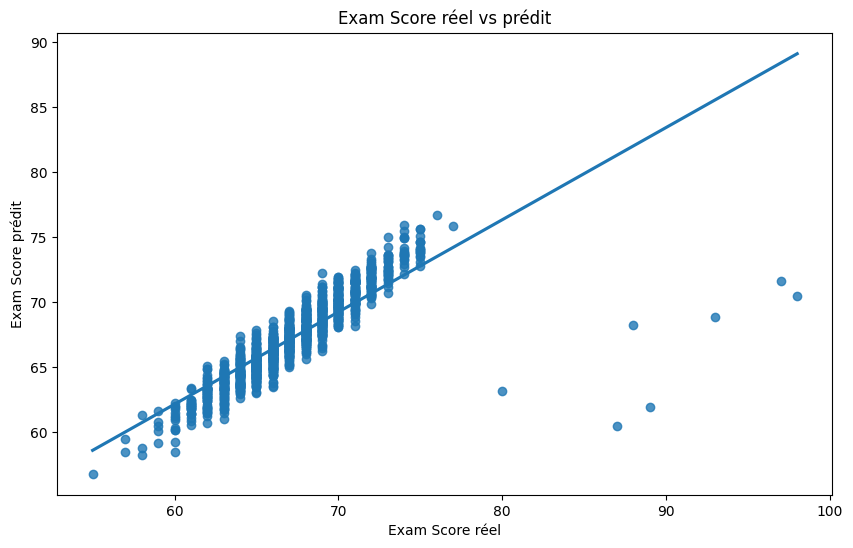

In [34]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Exam Score réel")
plt.ylabel("Exam Score prédit")
plt.title("Exam Score réel vs prédit")

In [41]:
df2.dropna(inplace=True)

In [42]:
y_pred = pipeline.predict(df2[numerical_columns + categorical_columns])
df2.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender'],
      dtype='object')

In [49]:
df2["Exam_Score"] = y_pred.round(2)
df2.reset_index(inplace=True)
df2.to_csv("new_data_school_predicted.csv", index=True)

In [ ]:
#Création des colonnes numériques et cathégoriques
numerical_columns = ["Attendance", "Hours_Studied", "Previous_Scores", "Tutoring_Sessions"]
categorical_columns = ["Access_to_Resources", "Parental_Involvement"]

# Preprocessing avec StandarScaler pour les nums et OneHotEncoder pour les cathégories
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Définition du model et création du pipeline
model = LinearRegression()
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Def X et y et petit train
X = df[numerical_columns + categorical_columns]
y = df["Exam_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

#Suppression des valeurs nuls
df2.dropna(inplace=True)

#Prédiction 
y_pred = pipeline.predict(df2[numerical_columns + categorical_columns])
df2.columns
#Création de la colonne et arrondi
df2["Exam_Score"] = y_pred.round(2)

#Reset des index
df2.reset_index(inplace=True)

#Sauvegarde de la df dans CSV
df2.to_csv("new_data_school_predicted.csv", index=True)